In [5]:
# from google.colab import drive
# drive.mount('/content/drive/')

# Essentials

In [6]:
# Importing all the necessary libraries
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk import tokenize, stem
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import string
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import unicodedata
import unidecode
from autocorrect import Speller
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from keras.callbacks import EarlyStopping, ModelCheckpoint

from google_trans_new import google_translator  

from ann_visualizer.visualize import ann_viz;
# from keras.utils.vis_utils import plot_model

2024-04-19 23:14:10.211691: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /Users/anju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anju/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anju/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anju/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Data Reading

In [8]:
#file_path = '/content/drive/MyDrive/Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx'

In [9]:
file_path ='/Users/anju/Downloads/NLP_final_project_chatbot/Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx'

In [10]:
df= pd.read_excel(file_path)

In [11]:
df.head(4)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


In [13]:
#unique values in each columns
for column in df.columns[2:9]:
    unique_values = df[column].value_counts()
    print(f"'{column}': {unique_values}")

'Countries': Countries
Country_01    251
Country_02    130
Country_03     44
Name: count, dtype: int64
'Local': Local
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
'Industry Sector': Industry Sector
Mining    241
Metals    134
Others     50
Name: count, dtype: int64
'Accident Level': Accident Level
I      316
II      40
III     31
IV      30
V        8
Name: count, dtype: int64
'Potential Accident Level': Potential Accident Level
IV     143
III    106
II      95
I       49
V       31
VI       1
Name: count, dtype: int64
'Genre': Genre
Male      403
Female     22
Name: count, dtype: int64
'Employee or Third Party': Employee or Third Party
Third Party             189
Employee                179
Third Party (Remote)     57
Name: count, dtype: int64


In [14]:
# Rename the columns in a correct fashion
df.rename(columns = { 'Data' : 'date',
                      'Industry Sector' : 'industry_sector', 
                      'Accident Level': 'accident_level',
                      'Countries' : 'country',
                      'Genre' : 'gender',
                      'Potential Accident Level' : 'potential_accident_level',
                      'Employee or Third Party' : 'employee_type', 
                      'Critical Risk' : 'critical_risk',
                    'Description':'description'}, inplace = True)

In [15]:
# Replace Level 6 value to Level 5 since there is only one value for it
df['potential_accident_level'] = df['potential_accident_level'].replace('VI', 'V')

In [16]:
df['potential_accident_level'].unique()

array(['IV', 'III', 'I', 'II', 'V'], dtype=object)

# Data Cleaning

In [17]:
#check for duplicated rows
df[df.duplicated()]

,Unnamed: 0,date,country,Local,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description


In [18]:
 #df[df.duplicated(subset=['Description'], keep=False)]

In [19]:
df = df.drop('Unnamed: 0', axis=1)

In [20]:
df[df.duplicated(keep = False)]

,date,country,Local,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description
76,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
261,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
302,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
344,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
354,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...


In [21]:
df.shape

(425, 10)

In [22]:
# Handle duplicates
df = df.drop_duplicates(keep = 'first')

In [23]:
df.shape

(418, 10)

In [24]:
df[df.duplicated(subset=['description'], keep=False)]

,date,country,Local,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description
37,2016-02-24,Country_02,Local_07,Mining,I,V,Male,Employee,Others,When starting the activity of removing a coil ...
38,2016-02-24,Country_02,Local_07,Mining,I,V,Female,Third Party,Others,When starting the activity of removing a coil ...
130,2016-05-26,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"In the geological reconnaissance activity, in ..."
131,2016-05-26,Country_03,Local_10,Others,I,I,Male,Employee,Others,"In the geological reconnaissance activity, in ..."
143,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,Project of Vazante that carried out sediment c...
144,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Others,Project of Vazante that carried out sediment c...
166,2016-07-07,Country_01,Local_03,Mining,IV,V,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
167,2016-07-07,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
261,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
263,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...


In [25]:
#number of unoqeu values in the columns
for col in df.columns:
    if (col!='description') and (col!='date'):
        print(df[col].value_counts())

country
Country_01    248
Country_02    129
Country_03     41
Name: count, dtype: int64
Local
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
industry_sector
Mining    237
Metals    134
Others     47
Name: count, dtype: int64
accident_level
I      309
II      40
III     31
IV      30
V        8
Name: count, dtype: int64
potential_accident_level
IV     141
III    106
II      95
I       45
V       31
Name: count, dtype: int64
gender
Male      396
Female     22
Name: count, dtype: int64
employee_type
Third Party             185
Employee                178
Third Party (Remote)     55
Name: count, dtype: int64
critical_risk
Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                

In [26]:
df.drop_duplicates(subset=['description'], keep='first', inplace=True)

In [27]:
df.shape

(411, 10)

# Data Analysis

## Univariate Analysis

In [28]:
# Creating a function to make univariate plots for analysis
def plot(df, col, title, palette, edgecolor):
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame.")

    plt.figure(figsize=(20, 15))
    
    # Plotting countplot
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x=col, palette=palette, edgecolor=edgecolor, order=df[col].value_counts().index)
    plt.title(title)
    
    # Plotting pie chart
    plt.subplot(2, 2, 2)
    plt.pie(df[col].value_counts(), autopct="%.2f", labels=df[col].value_counts().index, shadow=True, explode=[0.1]*len(df[col].value_counts()), startangle=-135)
    plt.title(title)
    
    plt.show()

In [29]:
df.columns

Index(['date', 'country', 'Local', 'industry_sector', 'accident_level',
       'potential_accident_level', 'gender', 'employee_type', 'critical_risk',
       'description'],
      dtype='object')

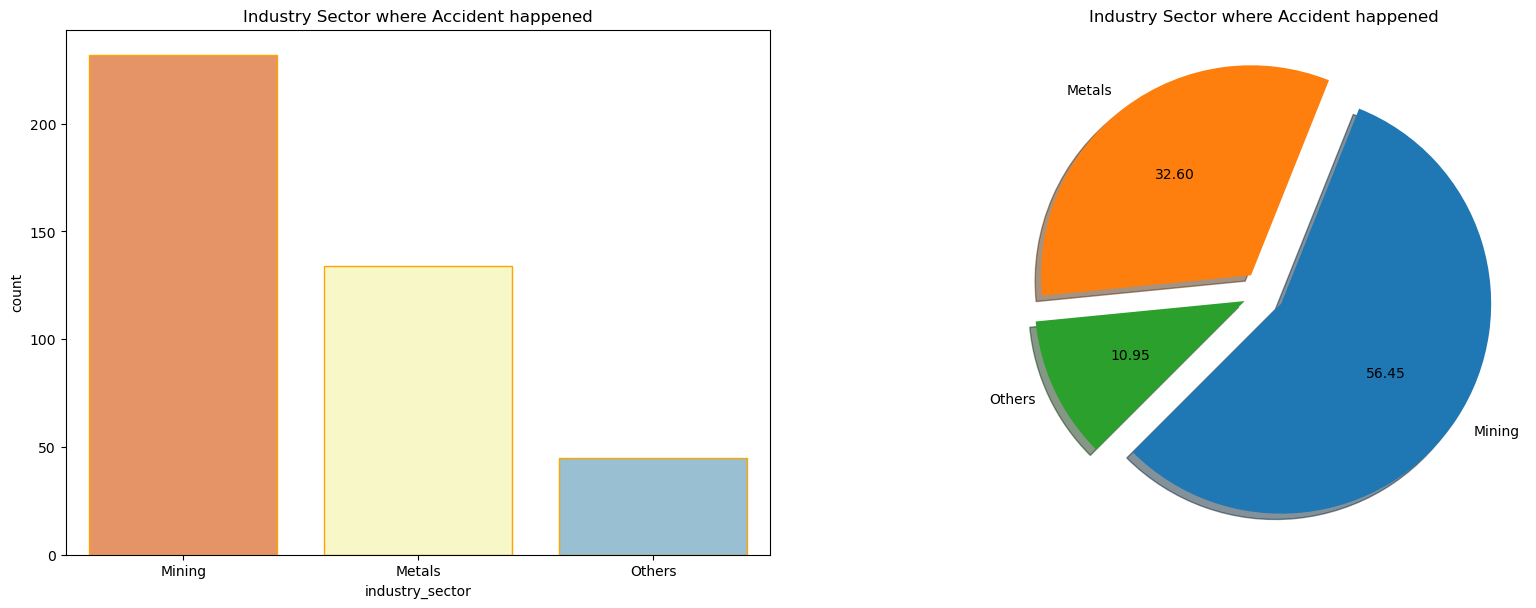

In [30]:
plot(df, 'industry_sector', 'Industry Sector where Accident happened', 'RdYlBu', 'orange')

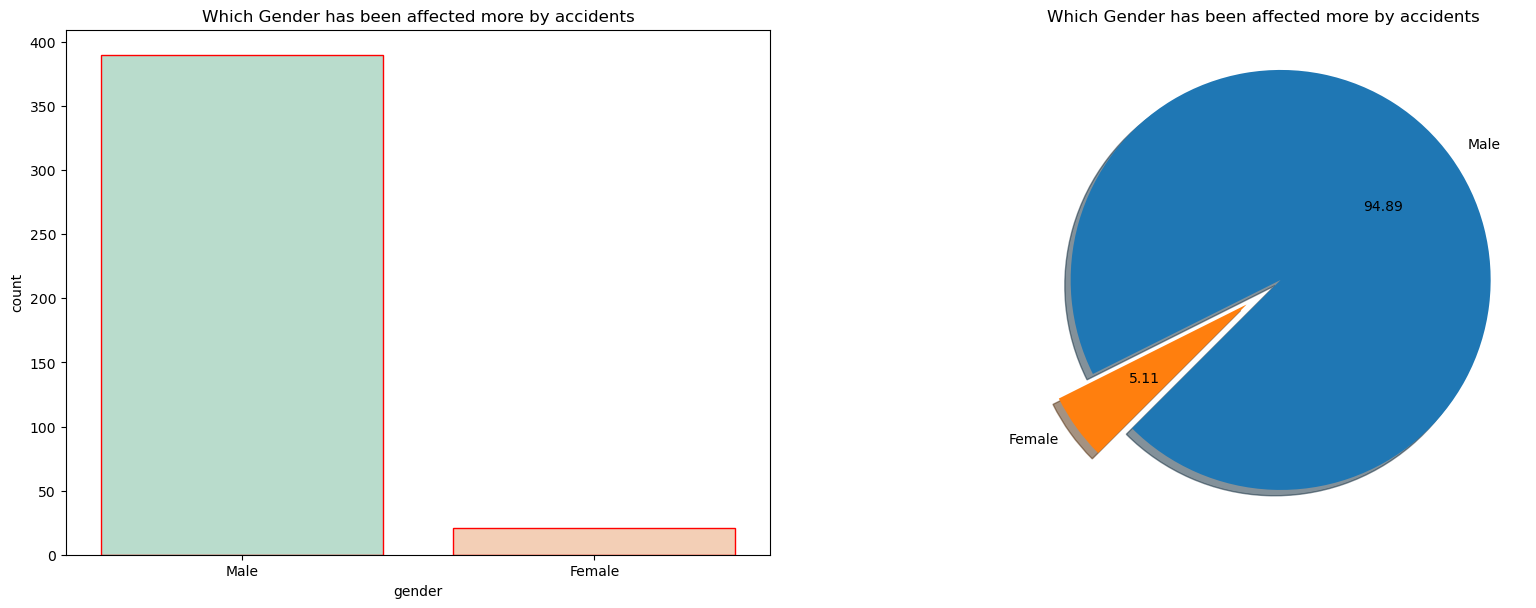

In [31]:
plot(df, 'gender', 'Which Gender has been affected more by accidents', 'Pastel2', 'red')

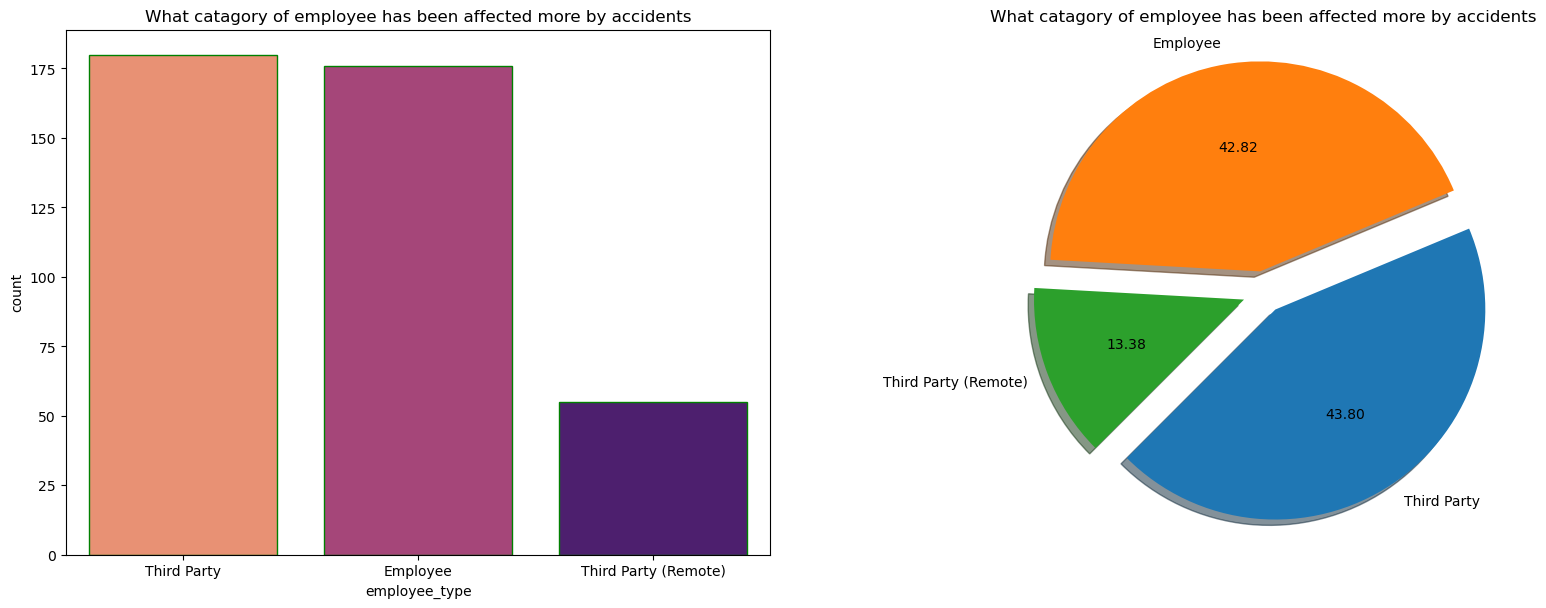

In [32]:
plot(df,'employee_type', 'What catagory of employee has been affected more by accidents', 'magma_r', 'green')

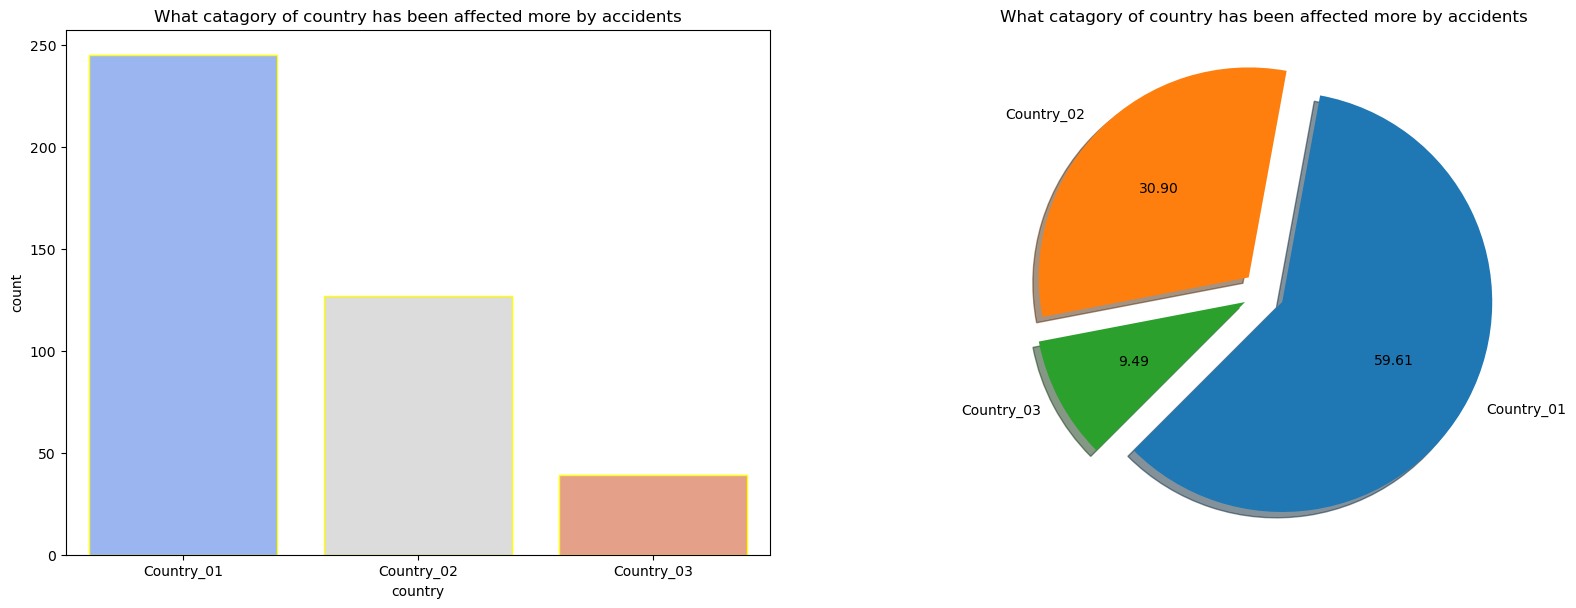

In [33]:
plot(df,'country', 'What catagory of country has been affected more by accidents', 'coolwarm', 'yellow')

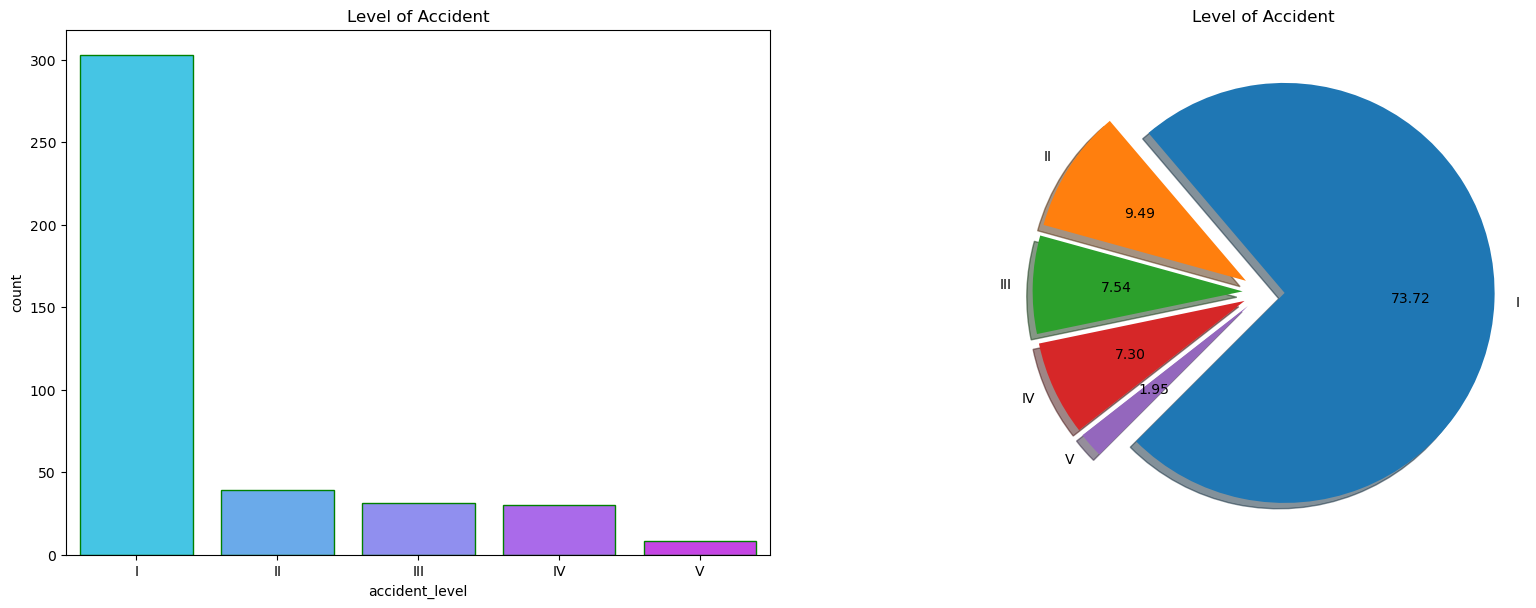

In [34]:
plot(df,'accident_level', 'Level of Accident', 'cool', 'green')

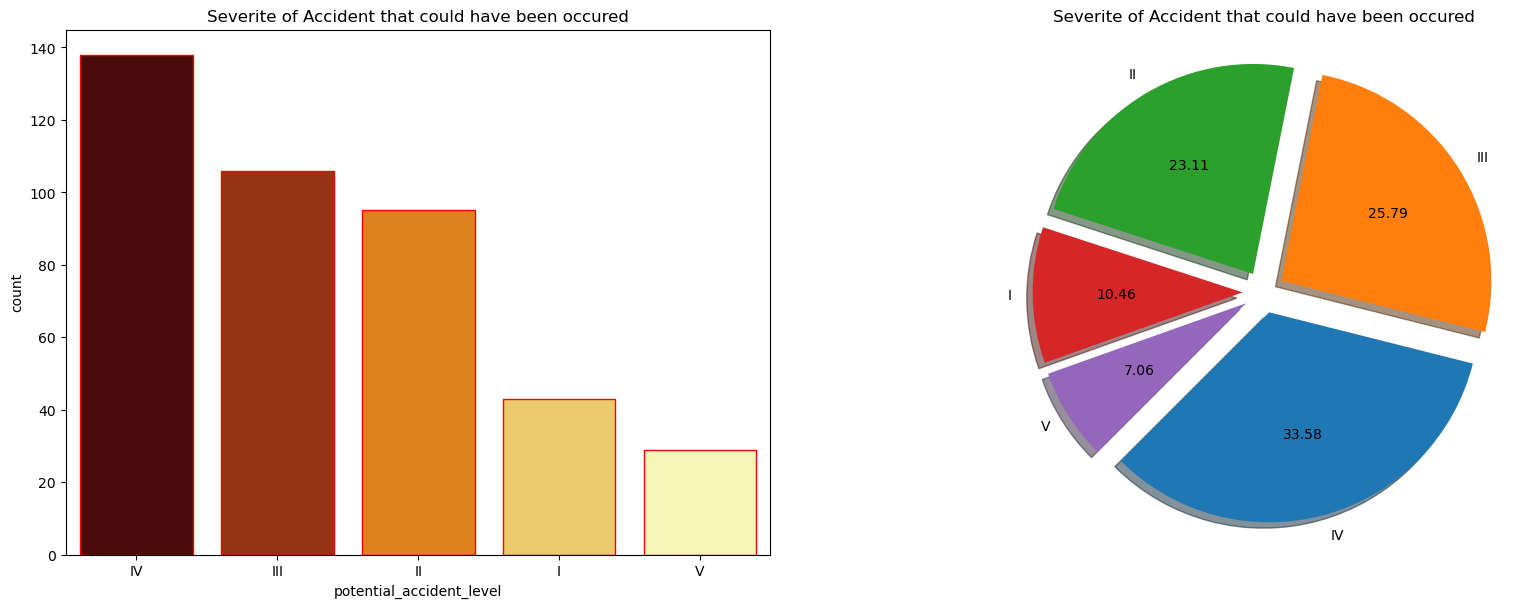

In [35]:
plot(df, 'potential_accident_level', 'Severite of Accident that could have been occured', 'afmhot', 'red')

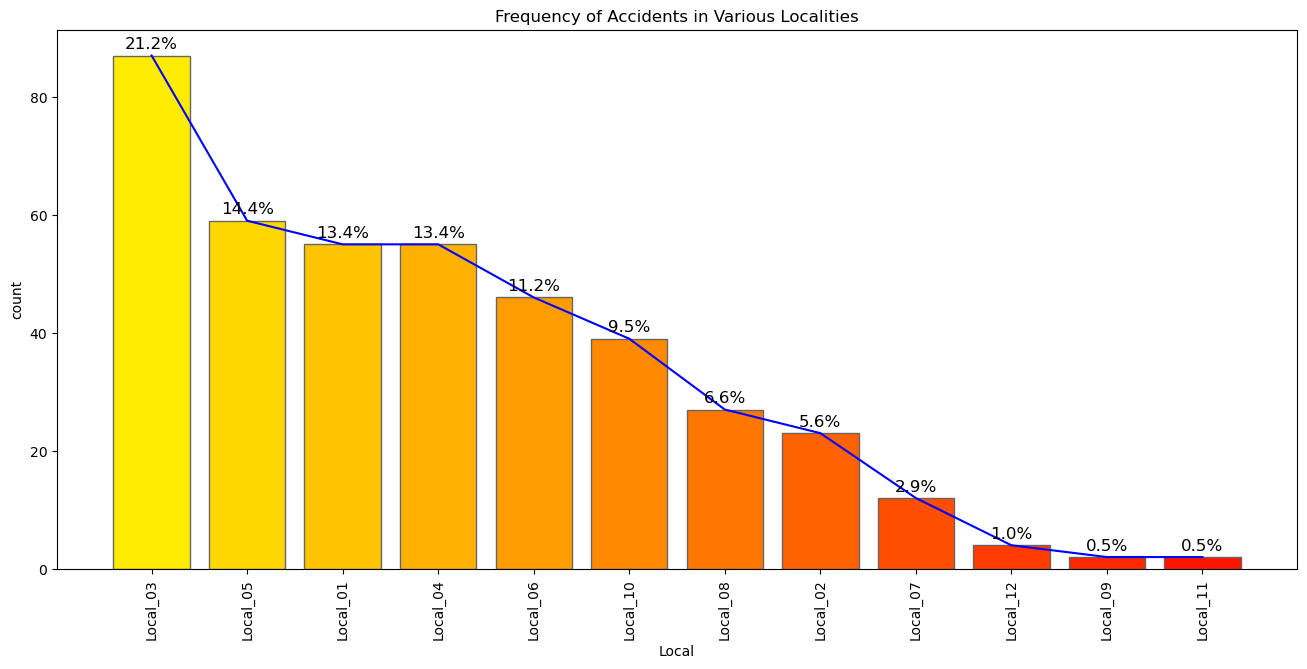

In [36]:
# Local Count plot
plt.figure(figsize=(16, 7))

# Countplot
ax = sns.countplot(x=df['Local'], order=df['Local'].value_counts().index, palette='autumn_r', edgecolor='.4', saturation=1)

# Line plot: specify the x and y arguments explicitly
sns.lineplot(x=df['Local'].value_counts().index, y=df['Local'].value_counts().values, color='b')

# Title and x-ticks rotation
plt.title('Frequency of Accidents in Various Localities')
plt.xticks(rotation='vertical')

# Annotate bars with percentage
total = sum(df['Local'].value_counts())
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate('{:.1f}%'.format(percentage), (p.get_x() + p.get_width() / 2, p.get_height()), size=12, ha='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

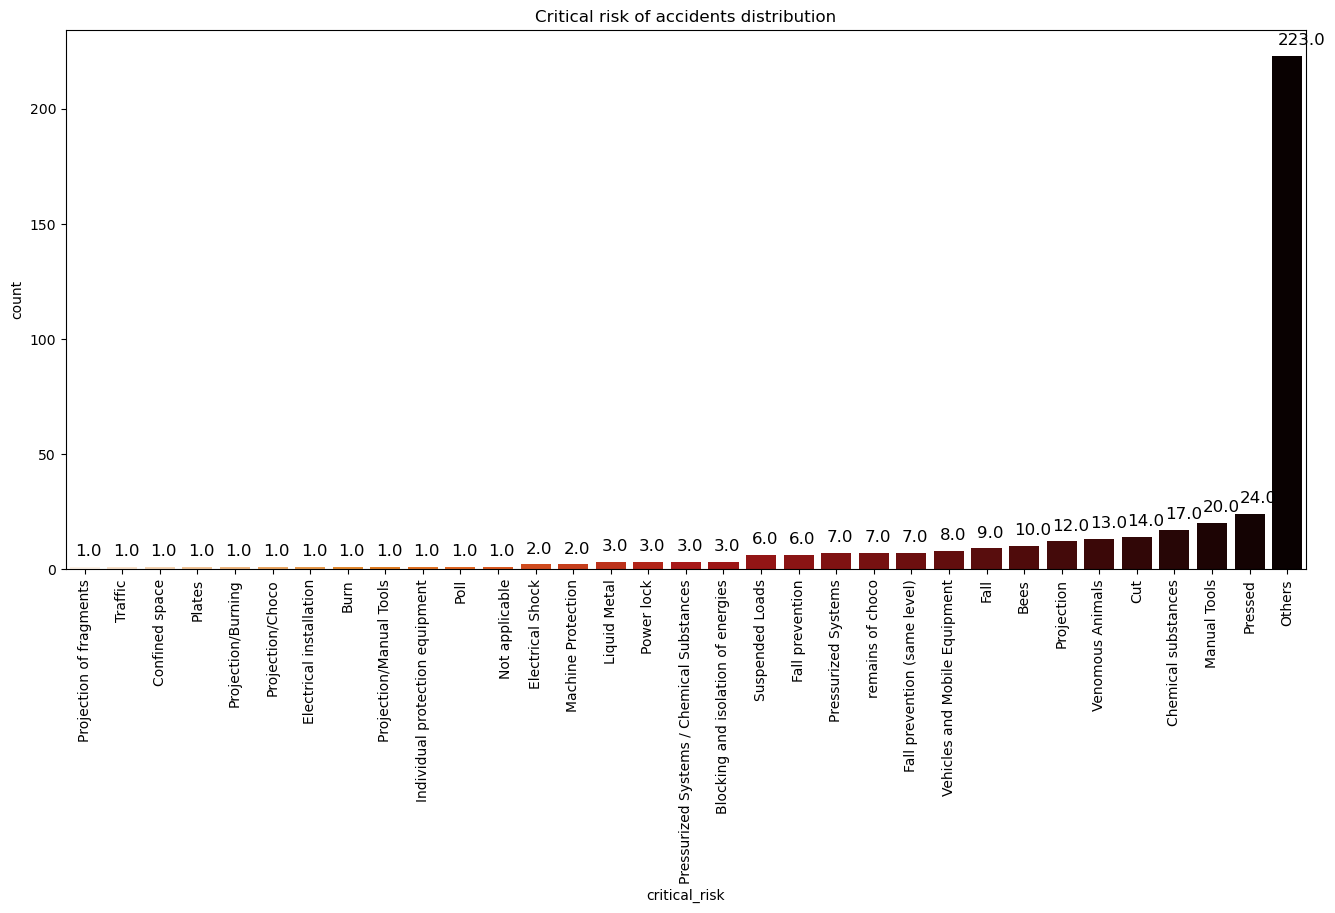

In [37]:
# Critical Risk Count
plt.figure(figsize = (16,7))
ax = sns.countplot(x = df['critical_risk'], order=df['critical_risk'].value_counts().sort_values(ascending = True).index, palette = 'gist_heat_r');
plt.title('Critical risk of accidents distribution');
plt.xticks(rotation = 'vertical');

total = sum(df['critical_risk'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (4, 8), 
                 textcoords = 'offset points')

## Bivariate Analysis

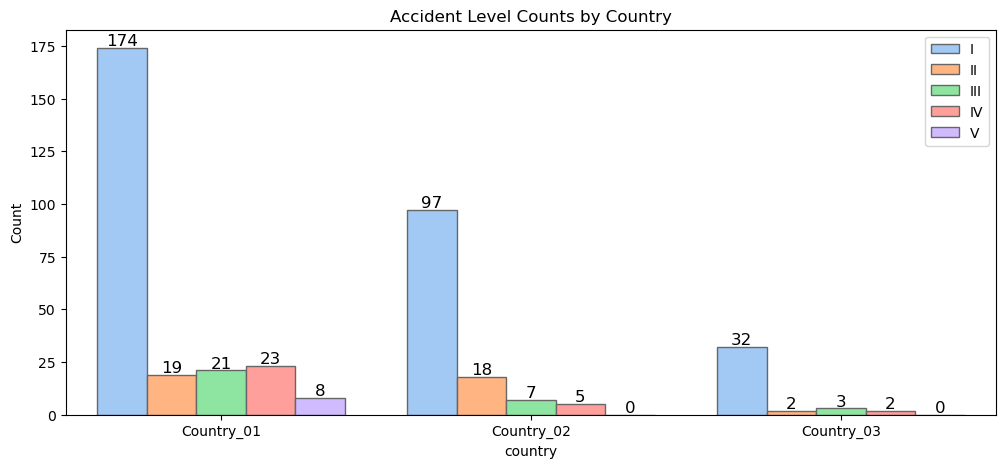

In [38]:
#Accident level counts by Country

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the countplot
# Use 'data' parameter to specify the DataFrame and 'x' parameter for the column to plot
ax = sns.countplot(data=df, x='country', hue='accident_level', hue_order=df['accident_level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

# Calculate total for annotations
total = sum(df['country'].value_counts())

# Annotate bars with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                size=12,
                xytext=(0, 5),
                textcoords='offset points')

# Title, ylabel, and legend location
plt.title('Accident Level Counts by Country')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

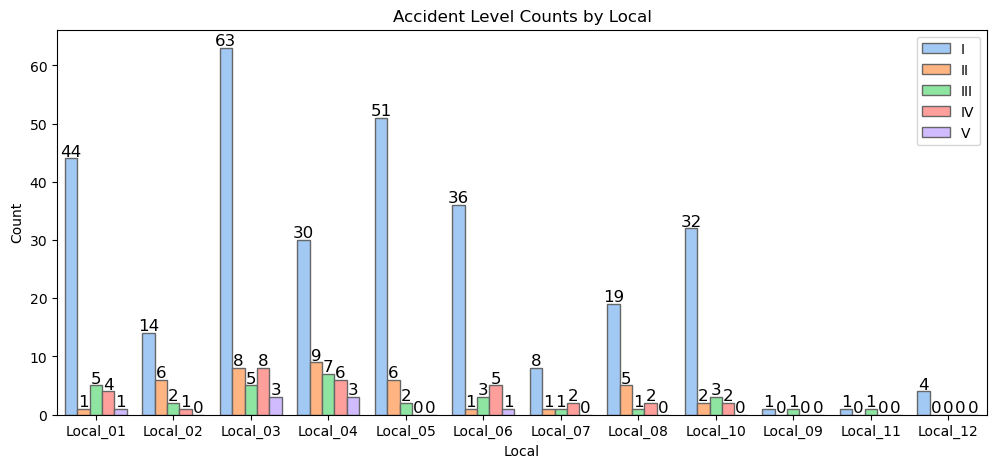

In [39]:
#Accident level counts by Local

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the countplot
# Use 'data' parameter to specify the DataFrame and 'x' parameter for the column to plot
ax = sns.countplot(data=df, x='Local', hue='accident_level', hue_order=df['accident_level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

# Calculate total for annotations
total = sum(df['Local'].value_counts())

# Annotate bars with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                size=12,
                xytext=(0, 5),
                textcoords='offset points')

# Title, ylabel, and legend location
plt.title('Accident Level Counts by Local')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

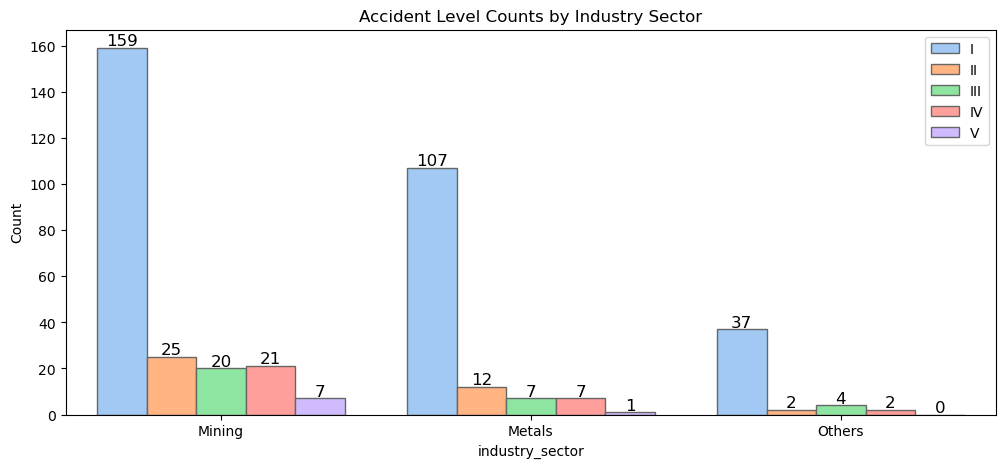

In [40]:
#Accident level counts by Industry Sector

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the countplot
# Use 'data' parameter to specify the DataFrame and 'x' parameter for the column to plot
ax = sns.countplot(data=df, x='industry_sector', hue='accident_level', hue_order=df['accident_level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

# Calculate total for annotations
total = sum(df['industry_sector'].value_counts())

# Annotate bars with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                size=12,
                xytext=(0, 5),
                textcoords='offset points')

# Title, ylabel, and legend location
plt.title('Accident Level Counts by Industry Sector')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

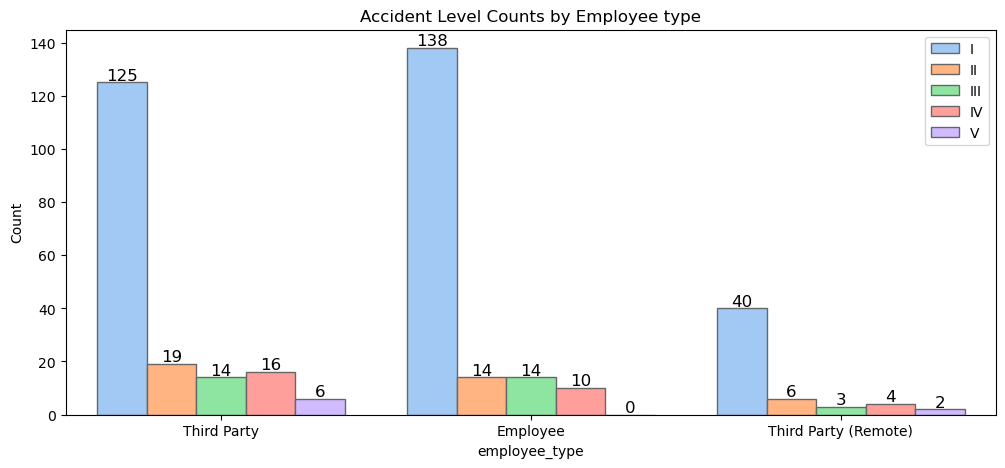

In [41]:
#Accident level counts by Industry Sector

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the countplot
# Use 'data' parameter to specify the DataFrame and 'x' parameter for the column to plot
ax = sns.countplot(data=df, x='employee_type', hue='accident_level', hue_order=df['accident_level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

# Calculate total for annotations
total = sum(df['employee_type'].value_counts())

# Annotate bars with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                size=12,
                xytext=(0, 5),
                textcoords='offset points')

# Title, ylabel, and legend location
plt.title('Accident Level Counts by Employee type')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

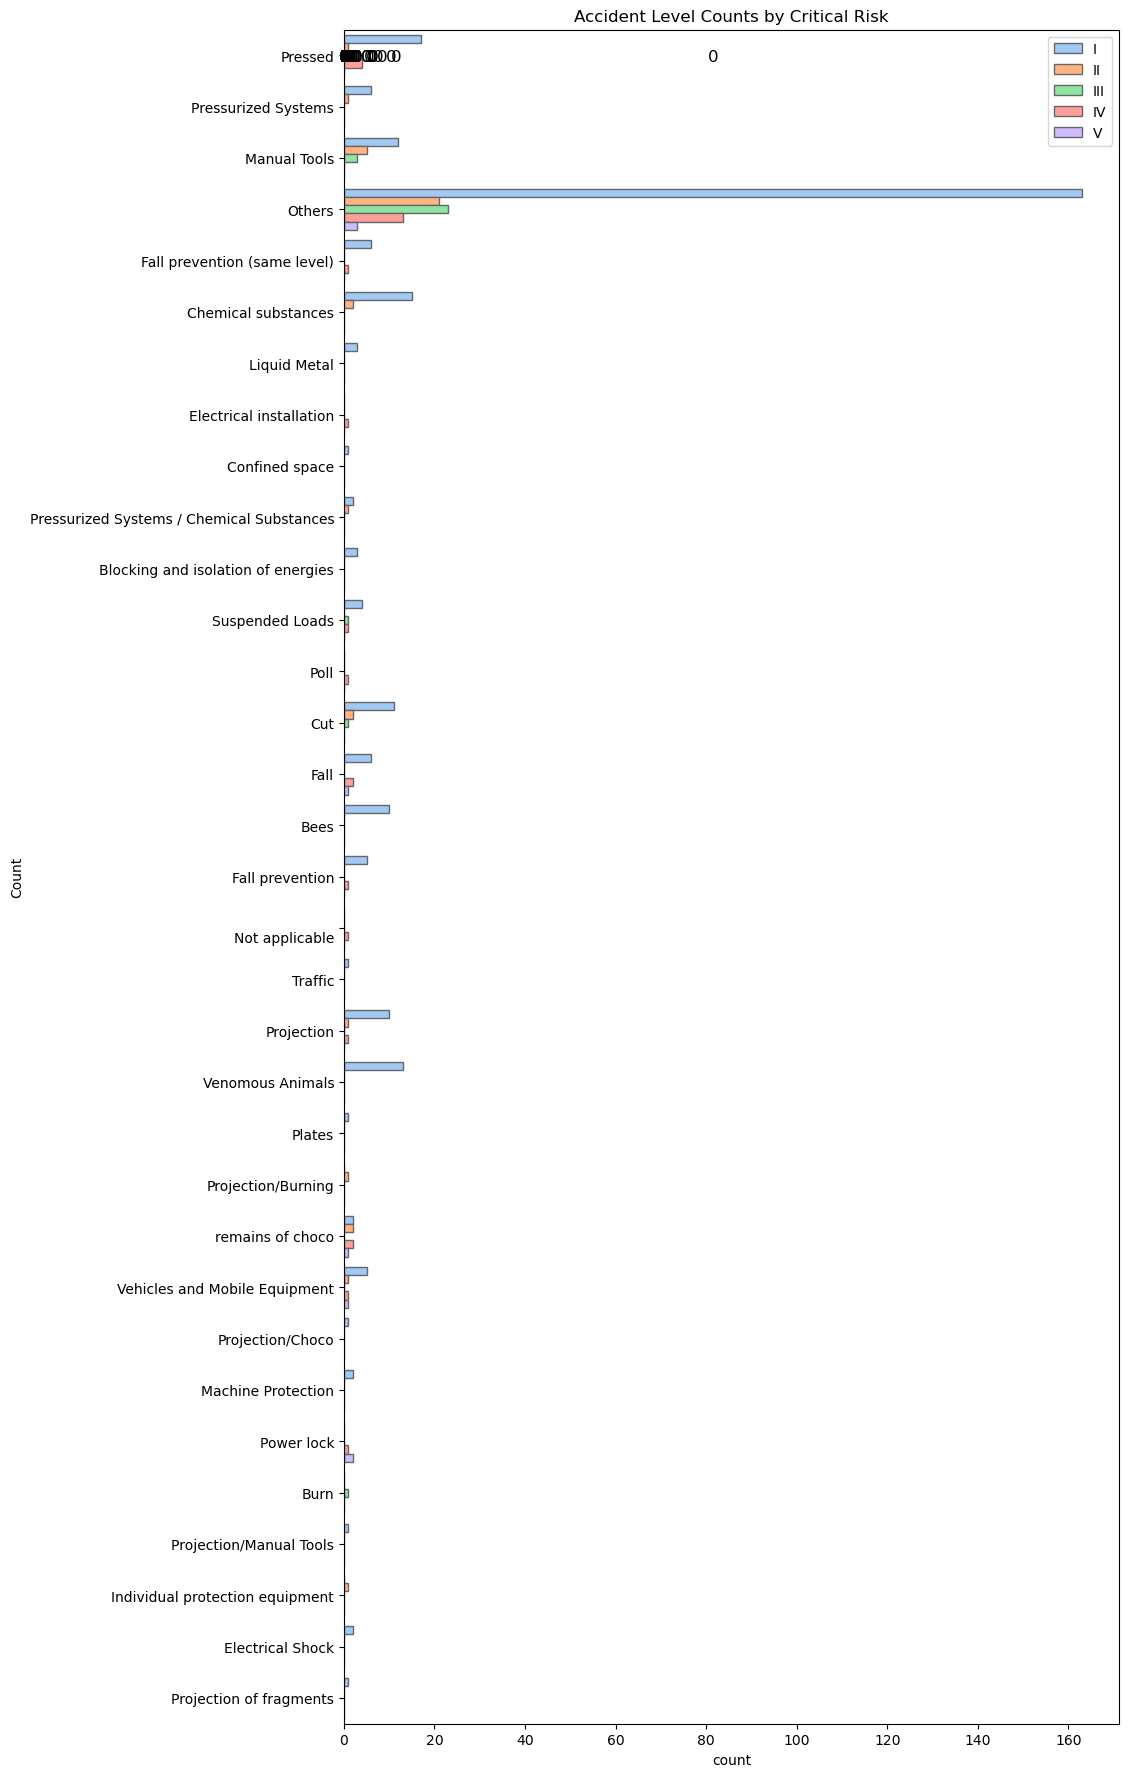

In [42]:
#Accident level counts by Critical Risk

# Set the figure size
plt.figure(figsize=(10, 22))

# Plot the countplot
# Use 'data' parameter to specify the DataFrame and 'x' parameter for the column to plot
ax = sns.countplot(data=df, y='critical_risk', hue='accident_level', hue_order=df['accident_level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

# Calculate total for annotations
total = sum(df['critical_risk'].value_counts())

# Annotate bars with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                size=12,
                xytext=(0, 5),
                textcoords='offset points')

# Title, ylabel, and legend location
plt.title('Accident Level Counts by Critical Risk')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

<Axes: title={'center': 'Correlation_Matrix'}>

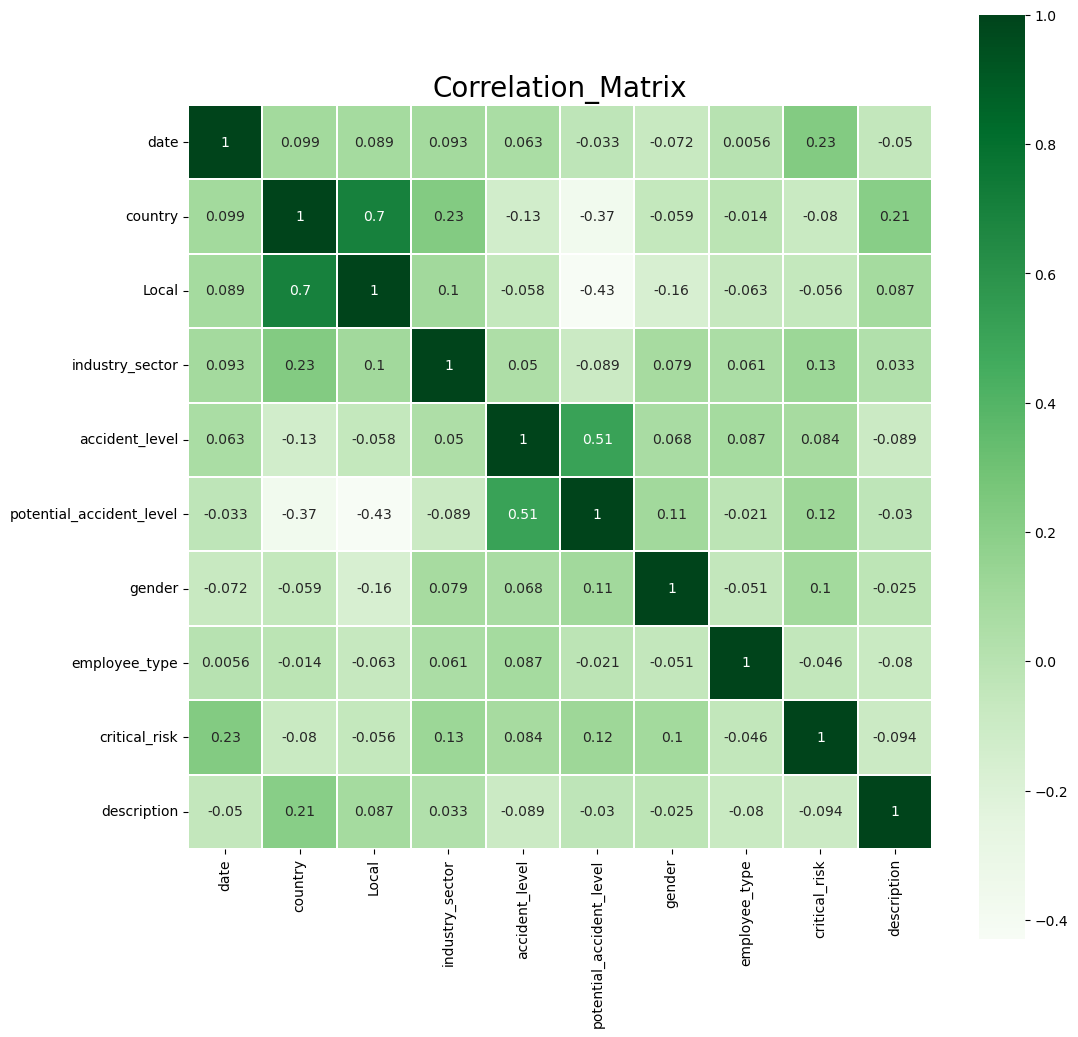

In [43]:
# Correlation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_enc = df.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(df_enc.corr(), square=True, cmap='Greens', annot=True, linewidth=0.2)

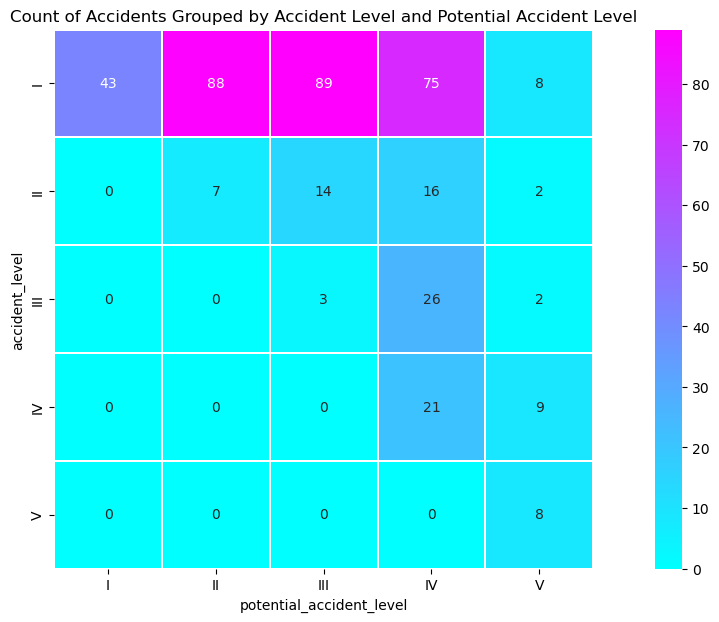

In [44]:
# Create a heatmap of the count of accidents grouped by accident level and potential accident level
plt.figure(figsize=(16, 7))
heatmap = sns.heatmap(pd.crosstab(df['accident_level'], df['potential_accident_level']), square=True, cmap='cool', annot=True, linewidth=0.1)
plt.title('Count of Accidents Grouped by Accident Level and Potential Accident Level')
plt.show()

## Time Series Analysis

In [45]:
# Finding day/month/week wise affect
df['Month'] = df.date.dt.month
df['Year'] = df.date.dt.year
df['Day'] = df.date.dt.day
df['Weekday'] = df.date.dt.weekday

Text(0.5, 1.0, 'Number of Accidents/Day (all countries)')

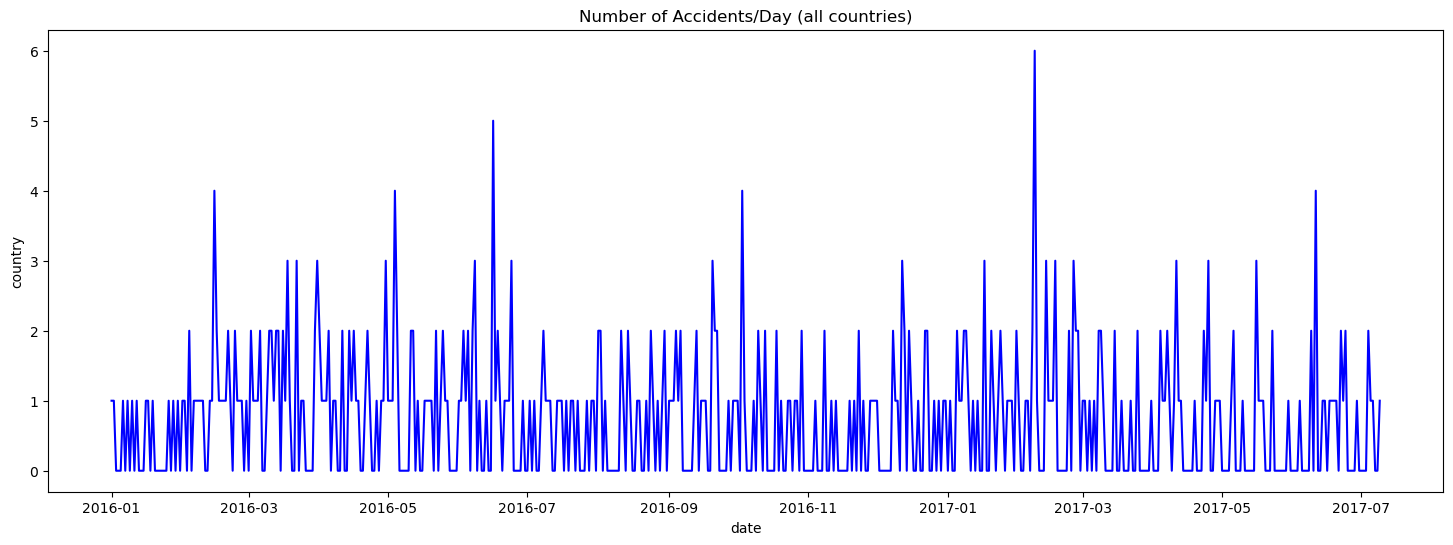

In [46]:
# Basic trend plot accumulating accidents of all the countries day wise
df.set_index('date', inplace=True)
df1= df.country.resample('24H').count()
                        
plt.figure(figsize=(18,6))
sns.lineplot(x = df1.index, y = df1, color='blue')
plt.title('Number of Accidents/Day (all countries)')

Text(0.5, 0, 'Month')

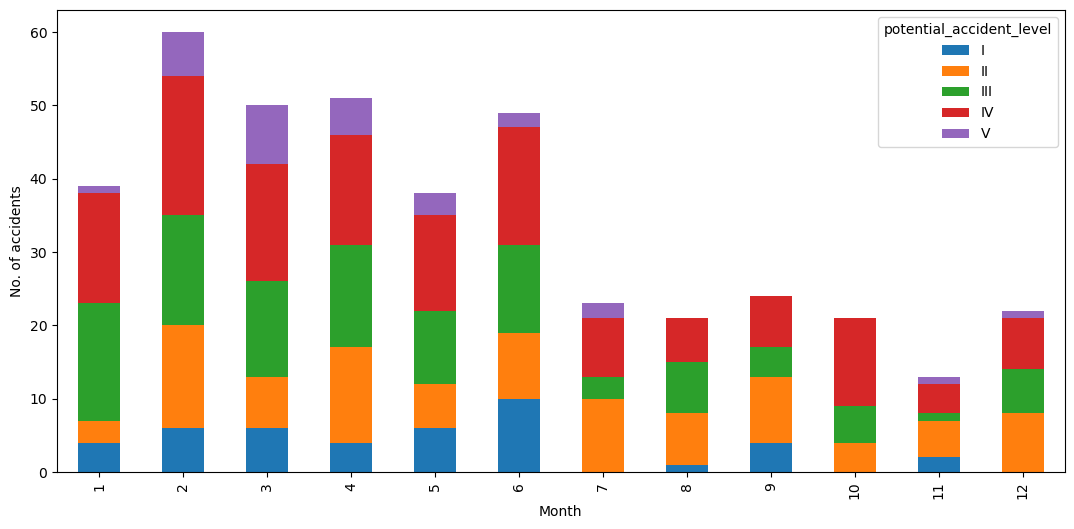

In [47]:
#Potential Accident level counts by Month
ct = pd.crosstab(columns=df['potential_accident_level'],index=df["Month"])
ax = ct.plot(kind="bar",stacked=True,figsize=(13,6))
ax.set_ylabel('No. of accidents')
ax.set_xlabel('Month')

In [48]:
df.head(3)

,country,Local,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description,Month,Year,Day,Weekday
date,,,,,,,,,,,,,
2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016,1,4
2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1,2016,2,5
2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1,2016,6,2


# Feature Selection

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Assuming the data is already loaded into a DataFrame called df
# Convert 'accident_level' to a categorical data type if it is not already
df['accident_level'] = df['accident_level'].astype('category')

# Preprocess categorical variables: One-hot encoding
categorical_vars = ['country', 'Local', 'industry_sector', 'potential_accident_level', 'gender', 'employee_type', 'critical_risk']
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = one_hot_encoder.fit_transform(df[categorical_vars])

# Create a DataFrame for the encoded categorical variables
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_vars))


# Reset index of the DataFrames
df.reset_index(drop=True, inplace=True)
encoded_categorical_df.reset_index(drop=True, inplace=True)

# Combine encoded categorical variables with numerical variables
numerical_vars = ['Month', 'Year', 'Day', 'Weekday']
data = pd.concat([df[numerical_vars], encoded_categorical_df], axis=1)

# The target variable
target = df['accident_level']

# Feature Selection: Using SelectKBest with chi2 for categorical variables
selector_chi2 = SelectKBest(chi2, k='all')
selector_chi2.fit(data, target)

# Feature importance scores (chi2)
chi2_scores = selector_chi2.scores_
chi2_pvalues = selector_chi2.pvalues_

# Display chi2 scores and p-values for each feature
print("Chi2 Scores:")
print(chi2_scores)
print("P-Values:")
print(chi2_pvalues)

# Feature Selection: Using SelectKBest with f_classif (ANOVA) for numerical variables
selector_anova = SelectKBest(f_classif, k='all')
selector_anova.fit(data[numerical_vars], target)

# Feature importance scores (ANOVA)
anova_scores = selector_anova.scores_
anova_pvalues = selector_anova.pvalues_

# Display ANOVA scores and p-values for each numerical feature
print("\nANOVA Scores:")
print(anova_scores)
print("P-Values:")
print(anova_pvalues)

# Model-based Feature Selection: RandomForestClassifier
model = RandomForestClassifier()
model.fit(data, target)

# Get feature importances from the random forest model
feature_importances = model.feature_importances_


Chi2 Scores:
[1.14865502e+01 5.38697096e-04 1.67374989e+01 5.68181951e+00
 5.01606780e+00 8.19141472e+00 2.16068015e+00 3.88408146e+00
 7.95557650e+00 1.83656575e+00 1.19023205e+01 8.12722004e+00
 3.60166601e+00 1.78403394e+00 3.41455075e+00 5.30725008e+00
 2.16068015e+00 5.30725008e+00 1.42574257e+00 3.46037542e+00
 3.95210678e+00 3.13429499e+00 1.53267327e+01 2.10065499e+01
 1.59734696e+01 4.55648425e+01 1.28920620e+02 2.81495806e+00
 1.51574665e-01 5.05726990e+00 3.07762328e+00 1.24916774e+00
 1.27000000e+01 3.56435644e+00 1.06930693e+00 1.22580645e+01
 3.43246270e+00 3.56435644e-01 1.68147311e+00 7.12871287e-01
 1.27000000e+01 8.22296480e+00 1.93514851e+00 1.93309760e+00
 9.53846154e+00 1.06930693e+00 7.12871287e-01 8.90554259e+00
 3.35780844e+00 3.56435644e-01 1.27000000e+01 7.00666667e+01
 4.11585919e+00 1.48144924e+00 2.32140137e+00 1.32350216e+00
 3.56435644e-01 9.53846154e+00 3.56435644e-01 3.56435644e-01
 2.11017247e+00 3.56435644e-01 5.69054408e+00 4.63366337e+00
 1.49649412

In [53]:
# Significant categorical features based on chi-square test
significant_chi2_features = []
for i, var in enumerate(categorical_vars):
    if chi2_pvalues[i] < 0.05:  # Select features with p-value less than 0.05
        significant_chi2_features.append(var)

# Significant numerical features based on ANOVA test
significant_anova_features = []
for i, var in enumerate(numerical_vars):
    if anova_pvalues[i] < 0.05:  # Select features with p-value less than 0.05
        significant_anova_features.append(var)

# Print significant features
print("Significant Categorical Features (Chi2 Test):", significant_chi2_features)
print("Significant Numerical Features (ANOVA Test):", significant_anova_features)


Significant Categorical Features (Chi2 Test): ['country', 'industry_sector']
Significant Numerical Features (ANOVA Test): ['Year']


# Data Cleaning

In [54]:
#creating a copy of df
data = df.copy()
data.head(3)

,country,Local,industry_sector,accident_level,potential_accident_level,gender,employee_type,critical_risk,description,Month,Year,Day,Weekday
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016,1,4
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1,2016,2,5
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1,2016,6,2


In [55]:
#!pip install contractions

In [56]:
#removing contractions
import contractions
# Function to remove contractions from text
def remove_contractions(text):
    return contractions.fix(text)

# Apply remove_contractions() to the 'Text' column
data['des_new'] = data['description'].apply(remove_contractions)

In [57]:
#Remove HTML tags
from bs4 import BeautifulSoup

# Function to remove HTML tags from text
def remove_html_tags(text):
    # Use BeautifulSoup to parse HTML and extract text without tags
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    return cleaned_text

# Apply the function to the 'Description' column
data['des_new'] = data['des_new'].apply(remove_html_tags)

In [58]:
#Remove URL Tags
import re
# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

# Apply remove_urls() to the 'Description' column
data['des_new'] = data['des_new'].apply(remove_urls)

In [59]:
# Function to remove special characters and numbers from text
def remove_special_characters(text):
    # Use regular expression to remove special characters and numbers
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

# Apply the function to the 'Text' column
data['des_new'] = data['des_new'].apply(remove_special_characters)

In [60]:
data.iloc[0:6, data.columns.get_indexer(['description', 'des_new'])]

,description,des_new
0,While removing the drill rod of the Jumbo 08 f...,While removing the drill rod of the Jumbo for...
1,During the activation of a sodium sulphide pum...,During the activation of a sodium sulphide pum...
2,In the sub-station MILPO located at level +170...,In the substation MILPO located at level when...
3,Being 9:45 am. approximately in the Nv. 1880 C...,Being am approximately in the Nv CX OB the p...
4,Approximately at 11:45 a.m. in circumstances t...,Approximately at am in circumstances that the...
5,During the unloading operation of the ustulado...,During the unloading operation of the ustulado...


# Data Pre-Processing

In [61]:
#Lowercasing
data['des_new'] = data['des_new'].str.lower()

In [62]:
data.iloc[0:6, data.columns.get_indexer(['description', 'des_new'])]

,description,des_new
0,While removing the drill rod of the Jumbo 08 f...,while removing the drill rod of the jumbo for...
1,During the activation of a sodium sulphide pum...,during the activation of a sodium sulphide pum...
2,In the sub-station MILPO located at level +170...,in the substation milpo located at level when...
3,Being 9:45 am. approximately in the Nv. 1880 C...,being am approximately in the nv cx ob the p...
4,Approximately at 11:45 a.m. in circumstances t...,approximately at am in circumstances that the...
5,During the unloading operation of the ustulado...,during the unloading operation of the ustulado...


In [63]:
#Tokenization
from nltk.tokenize import word_tokenize

data['des_new'] = data['des_new'].apply(word_tokenize)

In [64]:
data.iloc[0:6, data.columns.get_indexer(['description', 'des_new'])]

,description,des_new
0,While removing the drill rod of the Jumbo 08 f...,"[while, removing, the, drill, rod, of, the, ju..."
1,During the activation of a sodium sulphide pum...,"[during, the, activation, of, a, sodium, sulph..."
2,In the sub-station MILPO located at level +170...,"[in, the, substation, milpo, located, at, leve..."
3,Being 9:45 am. approximately in the Nv. 1880 C...,"[being, am, approximately, in, the, nv, cx, ob..."
4,Approximately at 11:45 a.m. in circumstances t...,"[approximately, at, am, in, circumstances, tha..."
5,During the unloading operation of the ustulado...,"[during, the, unloading, operation, of, the, u..."


In [65]:
#Removing Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
data['des_new'] = data['des_new'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /Users/anju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
data.iloc[0:6, data.columns.get_indexer(['description', 'des_new'])]

,description,des_new
0,While removing the drill rod of the Jumbo 08 f...,"[removing, drill, rod, jumbo, maintenance, sup..."
1,During the activation of a sodium sulphide pum...,"[activation, sodium, sulphide, pump, piping, u..."
2,In the sub-station MILPO located at level +170...,"[substation, milpo, located, level, collaborat..."
3,Being 9:45 am. approximately in the Nv. 1880 C...,"[approximately, nv, cx, ob, personnel, begins,..."
4,Approximately at 11:45 a.m. in circumstances t...,"[approximately, circumstances, mechanics, anth..."
5,During the unloading operation of the ustulado...,"[unloading, operation, ustulado, bag, need, un..."


In [69]:
tokens = [word for row in data['des_new'] for word in row]

In [70]:
tokens[0:5]

['removing', 'drill', 'rod', 'jumbo', 'maintenance']

In [71]:
# Function to calculate ngrams
def extract_ngrams(data, num):
  # Taking ngrams on Description column text and taking the value counts of each of the tokens
  words_with_count  = nltk.FreqDist(nltk.ngrams(data, num)).most_common(30) # taking top 30 most common words

  # Creating the dataframe the words and thier counts
  words_with_count = pd.DataFrame(words_with_count, columns=['Words', 'Count'])

  # Removing the brackets and commans
  words_with_count.Words = [' '.join(i) for i in words_with_count.Words]

  # words_with_count.index = [' '.join(i) for i in words_with_count.Words]
  words_with_count.set_index('Words', inplace=True) # setting the Words as index

  # Returns the dataframe which contains unique tokens ordered by their counts 
  return words_with_count

In [72]:
# Uni-Grams
uni_grams = extract_ngrams(tokens, 1)

# Printing top words with their counts
uni_grams[0:10]

,Count
Words,
causing,164
hand,161
left,154
right,153
employee,148
operator,118
injury,104
time,100
activity,85


<Axes: ylabel='Words'>

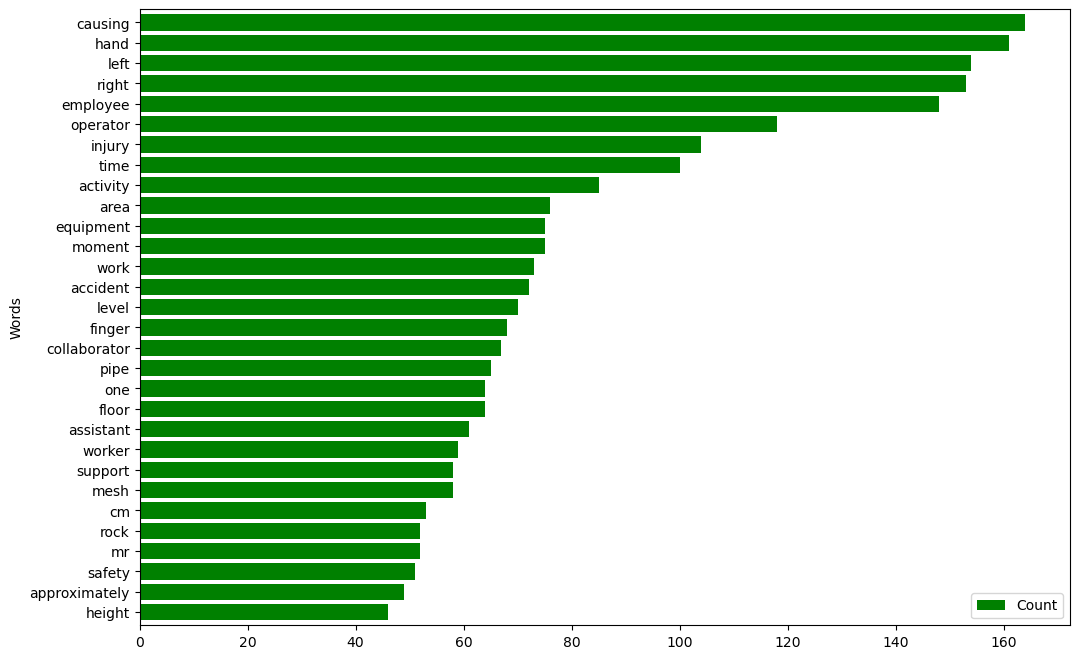

In [73]:
# Visualising the ngrams
uni_grams.sort_values(by='Count').plot.barh(color = 'green', width = 0.8, figsize = (12,8))

In [74]:
# Bi-Grams
bi_grams = extract_ngrams(tokens, 2)

# Printing the words with their counts
bi_grams[0:10]

,Count
Words,
left hand,69
right hand,57
time accident,55
causing injury,51
finger left,22
employee reports,22
injury described,18
medical center,17
described injury,17


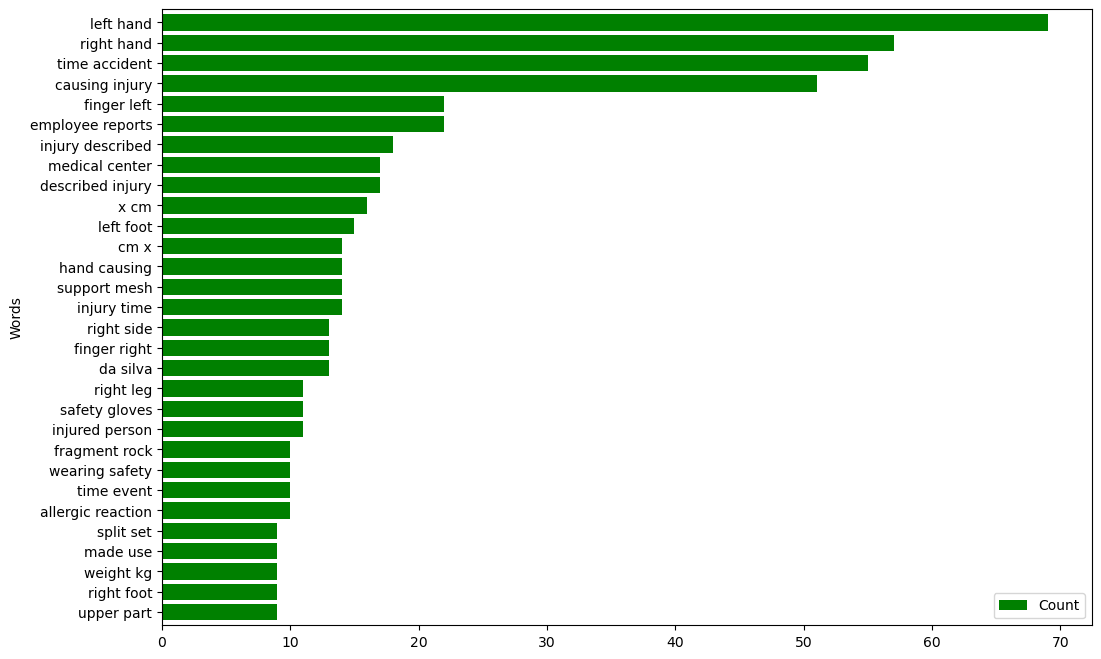

In [75]:
bi_grams.sort_values(by='Count').plot.barh(color = 'green', width = 0.8, figsize = (12,8));

In [76]:
# tri-Grams
tri_grams = extract_ngrams(tokens, 3)

# Printing the words with their counts
tri_grams[0:10]

,Count
Words,
finger left hand,21
causing injury described,13
finger right hand,13
injury time accident,13
cm x cm,12
generating described injury,8
time accident employee,8
hand causing injury,7
left hand causing,6


<Axes: ylabel='Words'>

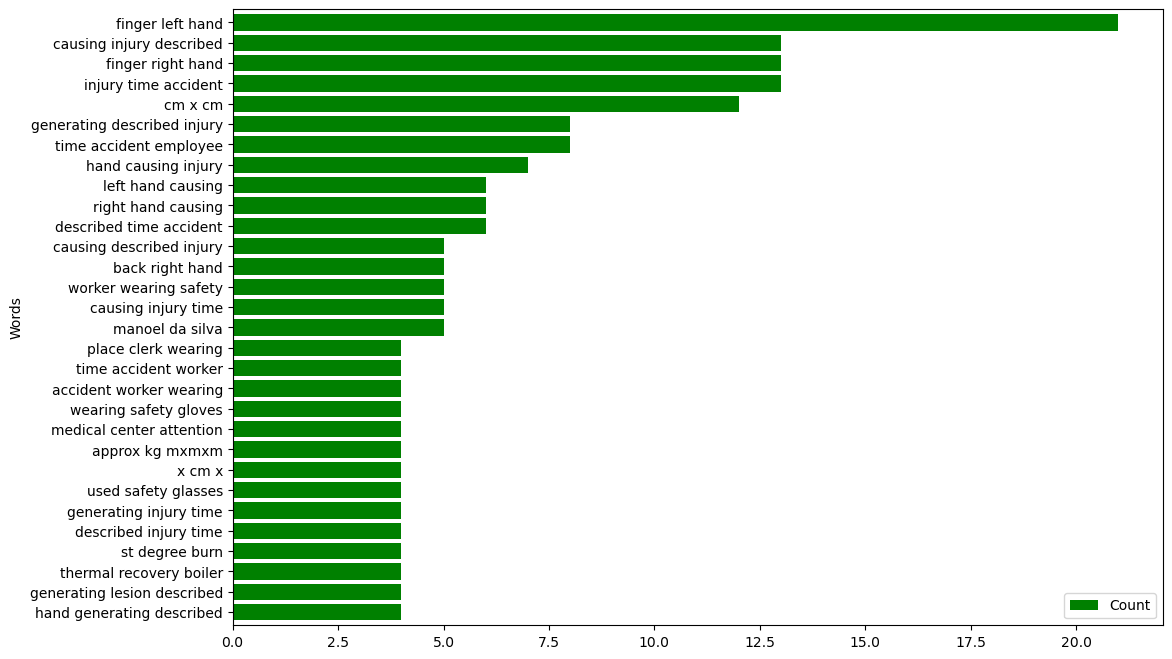

In [77]:
tri_grams.sort_values(by='Count').plot.barh(color = 'green', width = 0.8, figsize = (12,8))

In [78]:
#POS tagging
blob = TextBlob(str(data['des_new']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.head()

pos
NN     38
CD     11
JJ     10
RB      6
NNS     4
Name: count, dtype: int64

<Axes: ylabel='pos'>

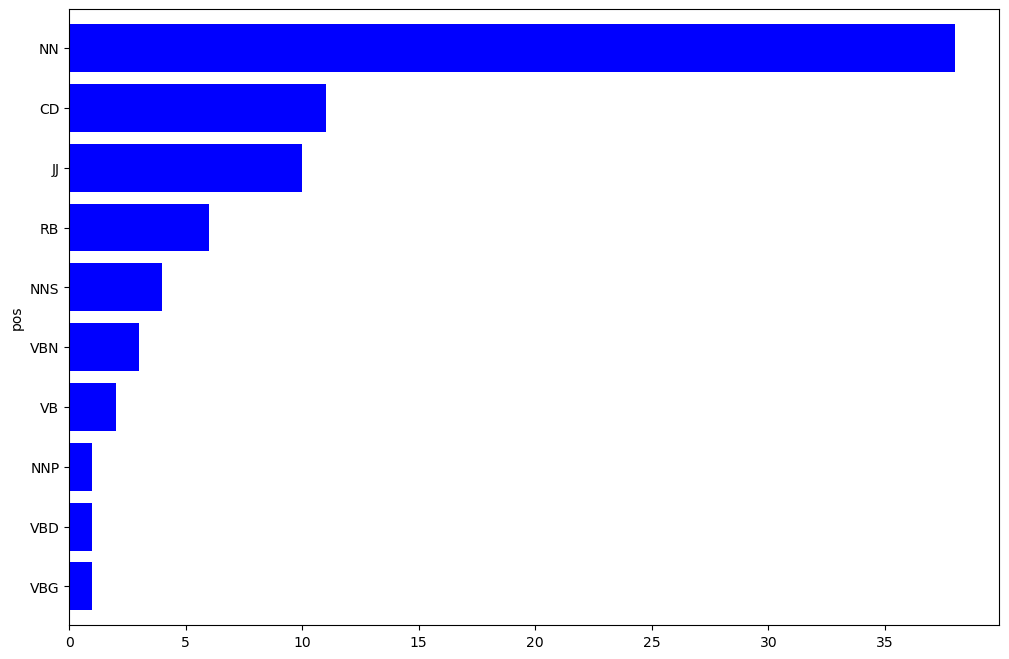

In [79]:
pos_df.sort_values().plot.barh(color = 'blue', width = 0.8, figsize = (12,8))

In [80]:
data.columns

Index(['country', 'Local', 'industry_sector', 'accident_level',
       'potential_accident_level', 'gender', 'employee_type', 'critical_risk',
       'description', 'Month', 'Year', 'Day', 'Weekday', 'des_new'],
      dtype='object')

In [81]:
#Stemming and Lemmatization

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('wordnet')

# Initialize PorterStemmer for stemming
#stemmer = PorterStemmer()

# Initialize WordNetLemmatizer for lemmatization
lemmatizer = WordNetLemmatizer()

# Function to perform stemming on a list of tokens
# def stem_sentence(tokens):
#     stemmed_tokens = [stemmer.stem(token) for token in tokens]
#     return ' '.join(stemmed_tokens)

# Function to perform lemmatization on a list of tokens
def lemmatize_sentence(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply stemming to the 'Description' column
#data['des_new'] = data['des_new'].apply(stem_sentence)

# Apply lemmatization to the 'Description' column
data['des_new'] = data['des_new'].apply(lemmatize_sentence)


[nltk_data] Downloading package punkt to /Users/anju/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anju/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
data.columns

Index(['country', 'Local', 'industry_sector', 'accident_level',
       'potential_accident_level', 'gender', 'employee_type', 'critical_risk',
       'description', 'Month', 'Year', 'Day', 'Weekday', 'des_new'],
      dtype='object')

In [82]:
data.loc[0:5, ['description','des_new']]

,description,des_new
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo maintenance superviso...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,substation milpo located level collaborator ex...
3,Being 9:45 am. approximately in the Nv. 1880 C...,approximately nv cx ob personnel begin task un...
4,Approximately at 11:45 a.m. in circumstances t...,approximately circumstance mechanic anthony gr...
5,During the unloading operation of the ustulado...,unloading operation ustulado bag need unclog d...


In [84]:
#since they are not going to add any value to the analysis
data.drop(columns=['description'], axis=1, inplace=True)

In [85]:
data.columns

Index(['country', 'Local', 'industry_sector', 'accident_level',
       'potential_accident_level', 'gender', 'employee_type', 'critical_risk',
       'Month', 'Year', 'Day', 'Weekday', 'des_new'],
      dtype='object')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country                   411 non-null    object  
 1   Local                     411 non-null    object  
 2   industry_sector           411 non-null    object  
 3   accident_level            411 non-null    category
 4   potential_accident_level  411 non-null    object  
 5   gender                    411 non-null    object  
 6   employee_type             411 non-null    object  
 7   critical_risk             411 non-null    object  
 8   Month                     411 non-null    int32   
 9   Year                      411 non-null    int32   
 10  Day                       411 non-null    int32   
 11  Weekday                   411 non-null    int32   
 12  des_new                   411 non-null    object  
dtypes: category(1), int32(4), object(8)
memory usage: 

In [87]:
new_data = data[['accident_level','des_new']]

In [88]:
new_data.shape

(411, 2)

In [89]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   accident_level  411 non-null    category
 1   des_new         411 non-null    object  
dtypes: category(1), object(1)
memory usage: 3.9+ KB


# Model Building

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# Load the data

# Convert `accident_level` to numerical using LabelEncoder
label_encoder = LabelEncoder()
data['accident_level'] = label_encoder.fit_transform(data['accident_level'])

# Vectorize the `des_new` column using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['des_new'])

# `y` is the `accident_level` column
y = data['accident_level']

In [91]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Random Forest

### Simple Random Forest

In [104]:
# Train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_clf.predict(X_train)
y_val_pred = rf_clf.predict(X_val)
y_test_pred = rf_clf.predict(X_test)

Training Set - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00         4

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287


Training Set - Confusion Matrix:


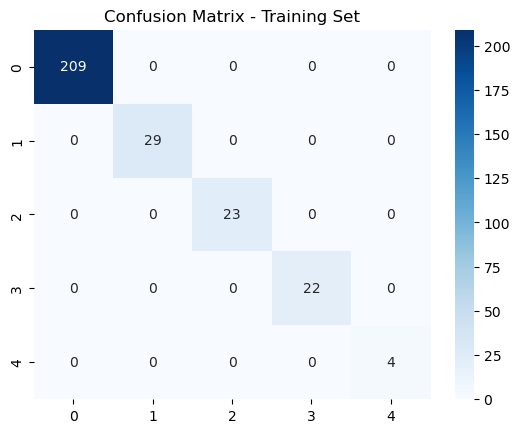

In [106]:
# Classification report and confusion matrix for the training set
print("Training Set - Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTraining Set - Confusion Matrix:")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()

Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.71        62
   macro avg       0.14      0.20      0.17        62
weighted avg       0.50      0.71      0.59        62


Validation Set - Confusion Matrix:


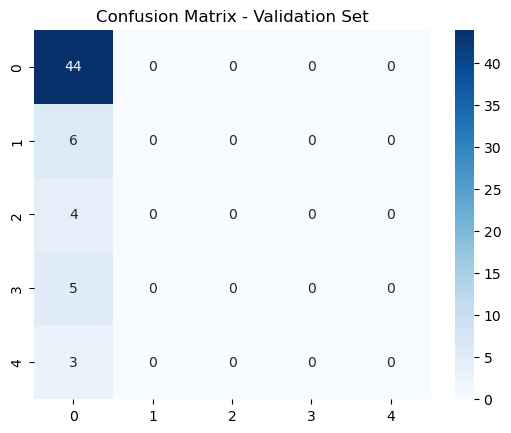

In [107]:
# Classification report and confusion matrix for the validation set
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_val_pred))
print("\nValidation Set - Confusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

Test Set - Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        50
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.81        62
   macro avg       0.16      0.20      0.18        62
weighted avg       0.65      0.81      0.72        62


Test Set - Confusion Matrix:


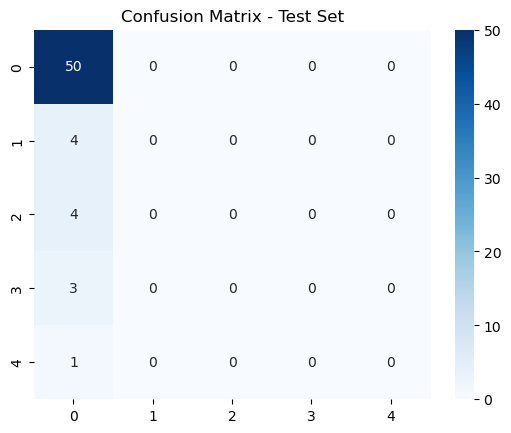

In [108]:
# Classification report and confusion matrix for the test set
print("Test Set - Classification Report:")
print(classification_report(y_test, y_test_pred))
print("\nTest Set - Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

Training Set:
Performance: The model achieved a perfect accuracy (1.00) on the training set, with precision, recall, and F1-score all equal to 1.00 across all classes.

Interpretation: This perfect performance is a sign that the model may have overfit the training data. Overfitting occurs when a model learns not only the patterns in the data but also the noise, resulting in excellent performance on the training set but potentially poor generalization to new data.

Validation Set:
Performance: The model performs poorly on the validation set, with an accuracy of 0.71. Precision, recall, and F1-scores are low across all classes except for class 0.

Interpretation: The low performance on the validation set, especially in classes 1 through 4, indicates that the model may be overfitting the training data and failing to generalize well to unseen data. The model heavily favors class 0, resulting in poor predictions for the other classes.

Test Set:
Performance: Similar to the validation set, the model's accuracy on the test set is 0.81, which is decent. However, the performance across classes is uneven, with high performance for class 0 and very low performance for classes 1 through 4.

Interpretation: The uneven performance and lack of predictive power in classes 1 through 4 suggest the model is biased towards class 0 and struggles with the other classes. This could be due to an imbalanced dataset or overfitting.

### Random Forest with Grid Search CV

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,make_scorer,recall_score

# Define the Random Forest model
rf_clf = RandomForestClassifier(class_weight="balanced",random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [10,20,30,40],
    'max_depth': [None, 4, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "max_features": ["sqrt", 0.5, 0.7],
}

scorer = make_scorer(recall_score, average='weighted')

# Set up the GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)

/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: Un

/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: Un

/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: Un

/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: Un

Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.80        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.66        62
   macro avg       0.14      0.19      0.16        62
weighted avg       0.49      0.66      0.56        62


Validation Set - Confusion Matrix:


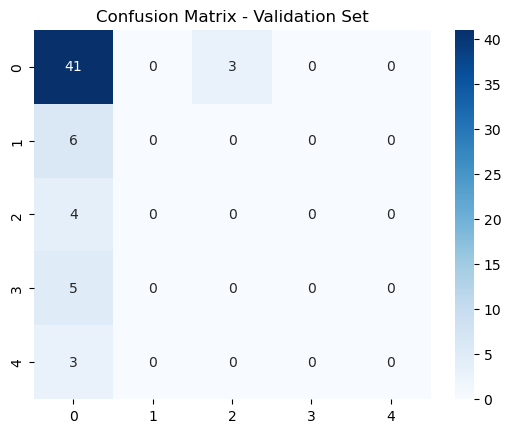

Best hyperparameters found by GridSearchCV:
{'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}


In [121]:
# Print the classification report for the validation set
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_val_pred))

# Plot the confusion matrix for the validation set
print("\nValidation Set - Confusion Matrix:")
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Retrieve the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

## Xg Boost

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)


Test Set - Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        50
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.81        62
   macro avg       0.16      0.20      0.18        62
weighted avg       0.65      0.81      0.72        62


Test Set - Confusion Matrix:


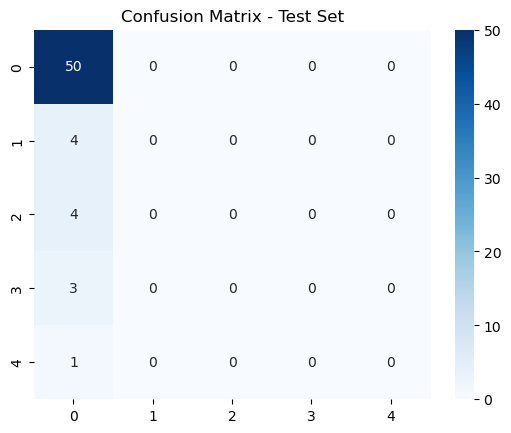

In [124]:
# Evaluate the model on the test set
y_test_pred = best_model.predict(X_test)
print("\nTest Set - Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nTest Set - Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

Training Set - Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       209
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00         4

    accuracy                           0.73       287
   macro avg       0.15      0.20      0.17       287
weighted avg       0.53      0.73      0.61       287


Training Set - Confusion Matrix:


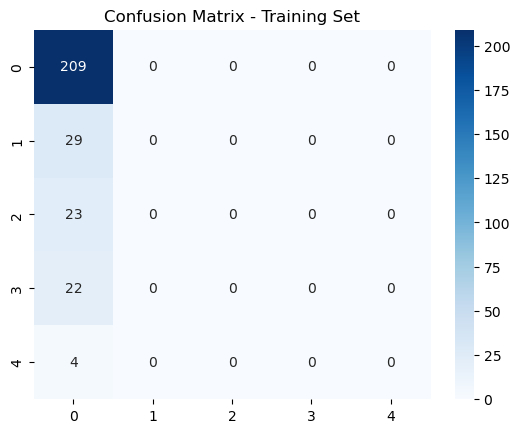

In [131]:
# Evaluate the model on the training set
y_train_pred = best_model.predict(X_train)
print("Training Set - Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTraining Set - Confusion Matrix:")
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()


Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.71        62
   macro avg       0.14      0.20      0.17        62
weighted avg       0.50      0.71      0.59        62


Validation Set - Confusion Matrix:


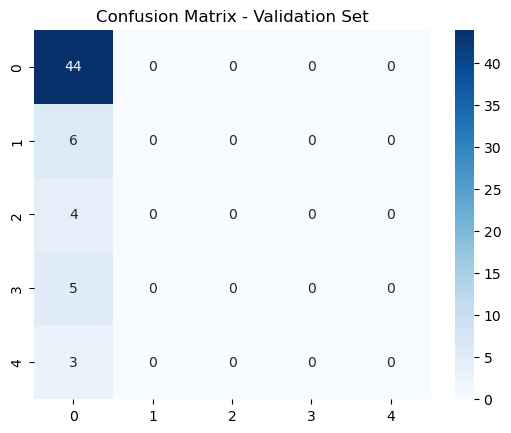

In [125]:
# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)
print("\nValidation Set - Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nValidation Set - Confusion Matrix:")
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [126]:
# Retrieve the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}


## SVM

In [127]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the SVM model
svm_clf = SVC(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] if 'rbf' in ['linear', 'rbf', 'poly'] else [1],
    'degree': [2, 3] if 'poly' in ['linear', 'rbf', 'poly'] else [3]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_


Test Set - Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        50
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.81        62
   macro avg       0.16      0.20      0.18        62
weighted avg       0.65      0.81      0.72        62


Test Set - Confusion Matrix:


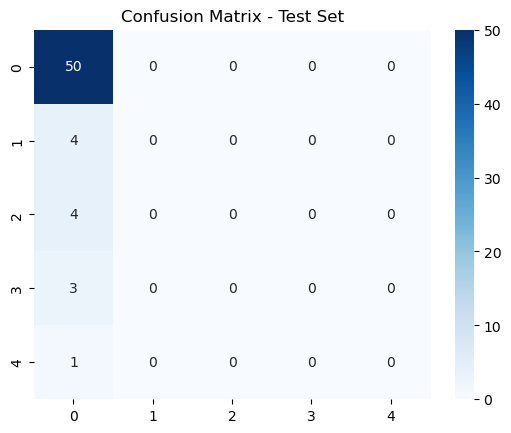

Best hyperparameters found by GridSearchCV:
{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [128]:
# Evaluate the model on the test set
y_test_pred = best_model.predict(X_test)
print("\nTest Set - Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nTest Set - Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Retrieve the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)


Training Set - Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       209
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00         4

    accuracy                           0.73       287
   macro avg       0.15      0.20      0.17       287
weighted avg       0.53      0.73      0.61       287


Training Set - Confusion Matrix:


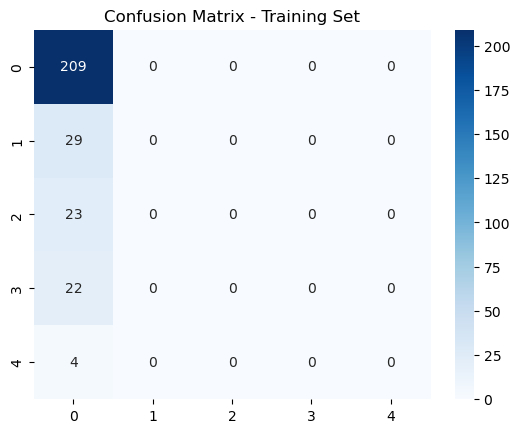

In [129]:
# Evaluate the model on the training set
y_train_pred = best_model.predict(X_train)
print("Training Set - Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTraining Set - Confusion Matrix:")
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()


Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.71        62
   macro avg       0.14      0.20      0.17        62
weighted avg       0.50      0.71      0.59        62


Validation Set - Confusion Matrix:


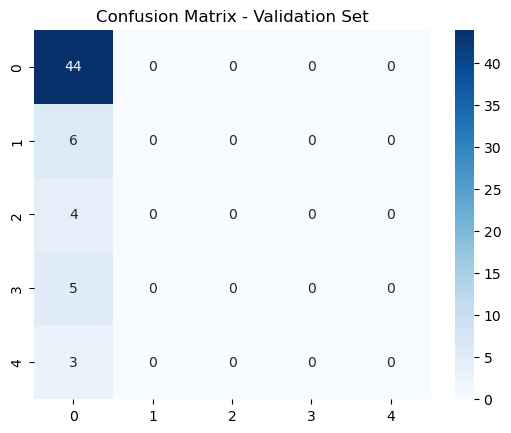

In [130]:
# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)
print("\nValidation Set - Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nValidation Set - Confusion Matrix:")
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

## SMOTE on Random Forest

Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         3

    accuracy                           0.66        62
   macro avg       0.24      0.22      0.22        62
weighted avg       0.54      0.66      0.59        62



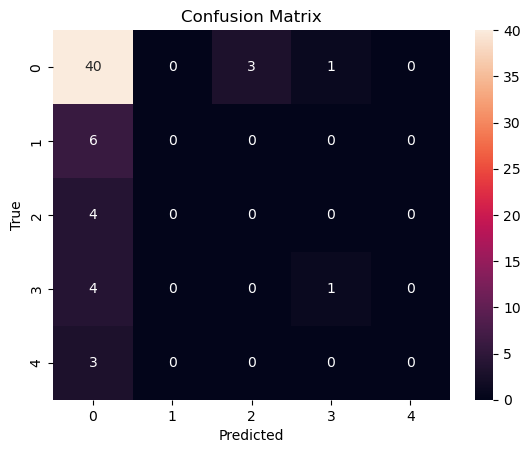

In [110]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize SMOTE with k_neighbors set to 1
smote = SMOTE(random_state=42, k_neighbors=2)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define Random Forest model with best hyperparameters and class weights
rf_clf = RandomForestClassifier(
    max_depth=20,
    max_features=0.5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=40,
    class_weight='balanced',  # Class weights set to 'balanced'
    random_state=42
)

# Train the model on the SMOTE-balanced training data
rf_clf.fit(X_train_balanced, y_train_balanced)

# Make predictions on the validation data
y_pred = rf_clf.predict(X_val)

# Evaluate the model using classification report and confusion matrix
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



Test Set - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.00      0.00      0.00         4
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.77        62
   macro avg       0.26      0.24      0.24        62
weighted avg       0.70      0.77      0.73        62


Test Set - Confusion Matrix:


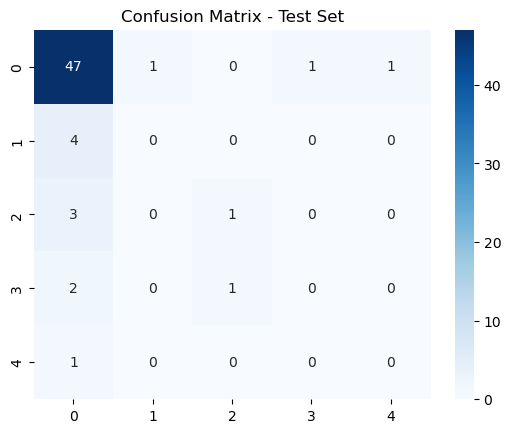

In [101]:
# Evaluate the model on the test set
y_test_pred = rf_clf.predict(X_test)
print("\nTest Set - Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nTest Set - Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

Training Set - Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       209
           1       0.96      0.86      0.91        29
           2       1.00      0.87      0.93        23
           3       1.00      0.77      0.87        22
           4       1.00      1.00      1.00         4

    accuracy                           0.95       287
   macro avg       0.98      0.90      0.94       287
weighted avg       0.96      0.95      0.95       287


Training Set - Confusion Matrix:


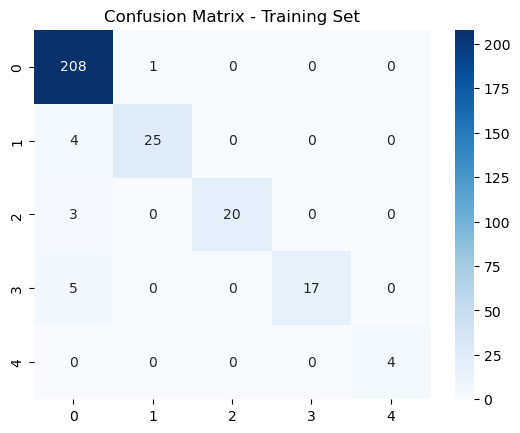

In [99]:
# Evaluate the model on the training set
y_train_pred = rf_clf.predict(X_train)
print("Training Set - Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTraining Set - Confusion Matrix:")
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()